# Partical Work 05 - Supervised learning – System Design and Debugging
- Author: *Romain Claret*
- Due-date: *22.10.2018*

## Exerice 1 - Gradient descent using matrix calculation

a) 

Looks like batch. The implementation is not correct as it is. Indeed: 
- it misses the **np.matrix** of ones for theta
- the loss is not complete
- the gradientDescent function has a transposing problem

b)

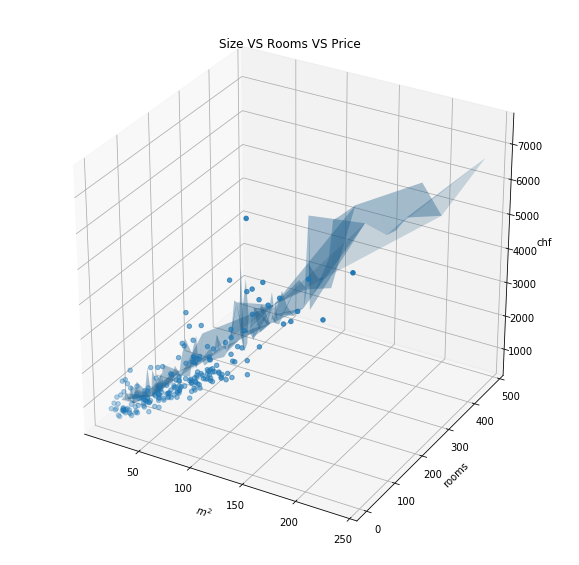

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

learning_rate = .1e-6
num_epoch = int(1e6)

dataset = pd.read_excel('lausanne-appart.xlsx',
                        usecols=2,
                        header=0,
                        names=['area', 'room', 'rent']
                       )

x = [dataset['area'].values, dataset['room'].values]
y = dataset['rent'].values

X = np.matrix([np.ones(len(y)), x[0], x[1]]).T

def hypothesis(theta,X):  #theta = 1xD, X = DxN, output 1xN
    return np.dot(theta,X)

def gradientDescent(X,y,learning_rate,num_epoch,verbose=False):
    N = X.shape[0]      # number of sample
    D = X.shape[1]      # number of dimensions
    theta = np.matrix(np.ones(D))  # init thetas to some values <= here a modification
    X_trans = X.transpose() # X_trans is DxN
    
    for i in range(0,num_epoch):
        h = hypothesis(theta,X_trans)  #N dimension
        loss = h-y - np.ones(N)        #N dimension <= here a modification
        gradient = X_trans.dot(loss.T) * (1.0/N)  # <= here a modification
        theta = theta - learning_rate * (1.0/N) * gradient # tht: 1x2 grad: 2x1
    return theta

theta_nn = gradientDescent(X, y, learning_rate, num_epoch)

h_theta_x = theta_nn[2,0] + theta_nn[2,1]*x[0] + theta_nn[2,2]*x[1]

fig = plt.figure(figsize=(10, 10)).gca(projection='3d')
fig.plot_trisurf(x[0], h_theta_x, y, alpha=0.2)

fig.scatter(x[0], x[1], y)
fig.set_title("Size VS Rooms VS Price")
fig.set_xlabel("$m^2$")
fig.set_ylabel(("rooms"))
fig.set_zlabel("chf")

plt.show()

c) Doesn't change much

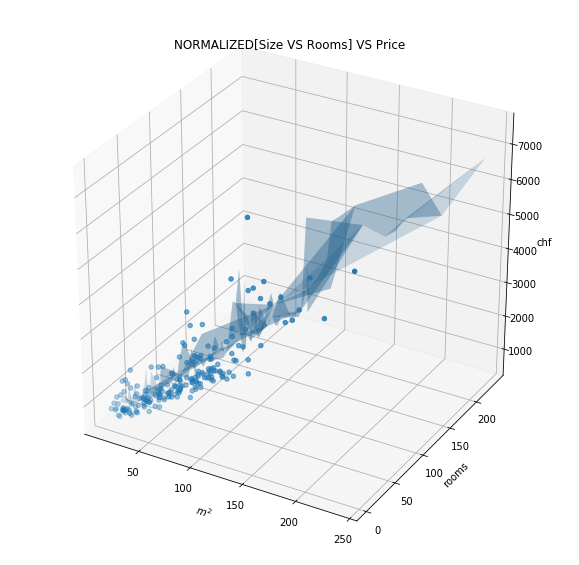

In [2]:
average, variance = np.average(x[0] + x[1]), np.var(x[0] + x[1])
x0_norm = (x[0] - average) / variance
x1_norm = (x[1] - average) / variance

X = np.matrix([np.ones(len(y)), x0_norm, x1_norm]).T

def hypothesis(theta,X):  #theta = 1xD, X = DxN, output 1xN
    return np.dot(theta,X)

def gradientDescent(X,y,learning_rate,num_epoch,verbose=False):
    N = X.shape[0]      # number of sample
    D = X.shape[1]      # number of dimensions
    theta = np.matrix(np.ones(D))  # init thetas to some values <= here a modification
    X_trans = X.transpose() # X_trans is DxN
    
    for i in range(0,num_epoch):
        h = hypothesis(theta,X_trans)  #N dimension
        loss = h-y - np.ones(N)        #N dimension <= here a modification
        gradient = X_trans.dot(loss.T) * (1.0/N)  # <= here a modification
        theta = theta - learning_rate * (1.0/N) * gradient # tht: 1x2 grad: 2x1
    return theta

theta_nn = gradientDescent(X, y, learning_rate, num_epoch)

h_theta_x = theta_nn[2,0] + theta_nn[2,1]*x[0] + theta_nn[2,2]*x[1]

fig = plt.figure(figsize=(10, 10)).gca(projection='3d')
fig.plot_trisurf(x[0], h_theta_x, y, alpha=0.2)

fig.scatter(x[0], x[1], y)
fig.set_title("NORMALIZED[Size VS Rooms] VS Price")
fig.set_xlabel("$m^2$")
fig.set_ylabel(("rooms"))
fig.set_zlabel("chf")

plt.show()

## Exercice 2 Linear regression optimisation

a)

In [3]:
train_dataset = pd.read_excel('overfitting.xlsx',
                        header=0,
                        names=['x', 'y'], sheet_name='train_set')
train_x = train_dataset['x'].values
train_y = train_dataset['y'].values

cv_dataset = pd.read_excel('overfitting.xlsx',
                        header=0,
                        names=['x', 'y'], sheet_name='cv_set')
cv_x = cv_dataset['x'].values
cv_y = cv_dataset['y'].values

b)

In [4]:
def J(h, x, y):
    sum_ = 0
    for i in range(len(x)):
        sum_ += np.square(h(x[i]) - y[i])
    return sum_ * (1 / (2 * len(x)))

c)

In [5]:
xUnseen = np.linspace(np.min(train_x), np.max(train_x))
orders = []
train_costs = []
cv_costs = []
xUnseens = []
yHats = []

for O in range(1, 7):
    orders.append(O)
    theta = np.polyfit(train_x, train_y, deg=O)
    h = np.poly1d(theta)
    train_costs.append(J(h, train_x, train_y))
    cv_costs.append(J(h, cv_x, cv_y))
    yHat = h(xUnseen)
    xUnseens.append(xUnseen)
    yHats.append(yHat)

d)

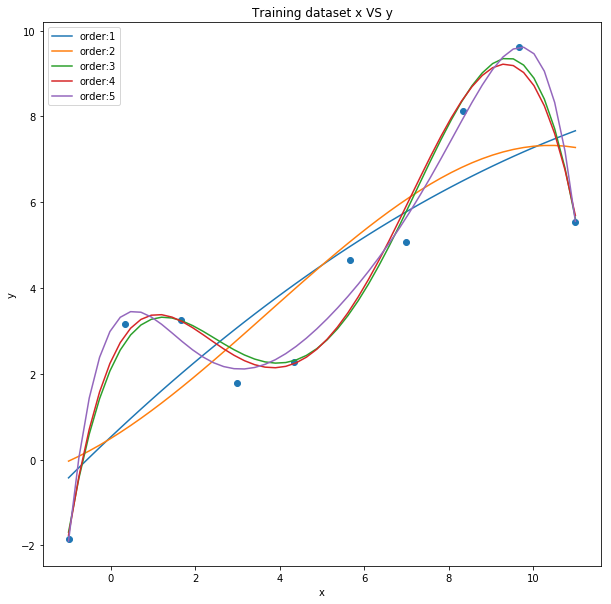

In [6]:
fig, ax1 = plt.subplots(figsize=(10,10))
ax1.scatter(train_x, train_y)
for o in range(1, len(orders)):
    ax1.plot(xUnseens[o], yHats[o], label="order:"+str(o))
    
ax1.set_title("Training dataset x VS y")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.legend()
plt.show()

e) 

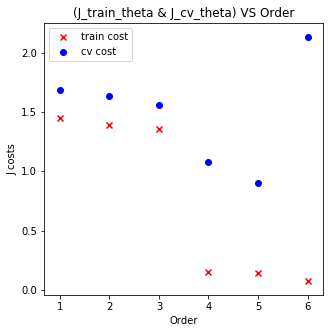

In [7]:
fig, ax1 = plt.subplots(figsize=(5,5))

ax1.scatter(orders, train_costs, label="train cost", marker="x", color="r")
ax1.scatter(orders, cv_costs, label="cv cost", marker="o", color="b")
ax1.set_title("(J_train_theta & J_cv_theta) VS Order")
ax1.set_xlabel("Order")
ax1.set_ylabel("J costs")
ax1.legend()
plt.show()

f) The best fit is with the order 3. Note that the order 3 and 4 are almost overlapping while using the plot. 4 is the perfect example of what we have to be careful with visual representations.